<center>
<img src="../../img/ods_stickers.jpg" />
    
## [mlcourse.ai](https://mlcourse.ai) – Open Machine Learning Course 

Author: [Yury Kashnitskiy](https://yorko.github.io). Translated by [Sergey Oreshkov](https://www.linkedin.com/in/sergeoreshkov/). This material is subject to the terms and conditions of the [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/) license. Free use is permitted for any non-commercial purpose.

Here we'll implement a regressor trained with stochastic gradient descent (SGD). Fill in the missing code. If you do evething right, you'll pass a simple embedded test.

## <center>Linear regression and Stochastic Gradient Descent

In [1]:
import numpy as np
import pandas as pd
from sklearn.base import BaseEstimator
from sklearn.metrics import log_loss, mean_squared_error, roc_auc_score
from sklearn.model_selection import train_test_split
from tqdm import tqdm

%matplotlib inline
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler

Implement class `SGDRegressor`. Specification:
- class is inherited from `sklearn.base.BaseEstimator`
- constructor takes parameters `eta` – gradient step ($10^{-3}$ by default) and `n_epochs` – dataset pass count (3 by default)
- constructor also creates `mse_` and `weights_` lists in order to track mean squared error and weight vector during gradient descent iterations
- Class has `fit` and `predict` methods
- The `fit` method takes matrix `X` and vector `y` (`numpy.array` objects) as parameters, appends column of ones to  `X` on the left side, initializes weight vector `w` with **zeros** and then makes `n_epochs` iterations of weight updates (you may refer to this [article](https://medium.com/open-machine-learning-course/open-machine-learning-course-topic-8-vowpal-wabbit-fast-learning-with-gigabytes-of-data-60f750086237) for details), and for every iteration logs mean squared error and weight vector `w` in corresponding lists we created in the constructor. 
- Additionally the `fit` method will create `w_` variable to store weights which produce minimal mean squared error
- The `fit` method returns current instance of the `SGDRegressor` class, i.e. `self`
- The `predict` method takes `X` matrix, adds column of ones to the left side and returns prediction vector, using weight vector `w_`, created by the `fit` method.

In [12]:
np.array([1, 2, 3]).reshape(3,1)

array([[1],
       [2],
       [3]])

In [23]:
np.array([1, 2, 3]).reshape(3)

1

In [17]:
for x in np.hstack((np.ones((3, 1)), np.array([1, 2, 3]).reshape(3,1))):
    print(x)

[1. 1.]
[1. 2.]
[1. 3.]


In [68]:
class SGDRegressor(BaseEstimator):
    def __init__(self, eta=1e-3, n_epochs=3):
        self.eta=eta
        self.n_epochs=n_epochs
        self.mse_ = []
        self.weights_ = []
        reg.w_ = None
        
    def fit(self, X, y):
        X_mx = np.hstack([np.ones((X.shape[0], 1)), X])
        w = np.zeros(X_mx.shape[1])
        
        for ep in range(self.n_epochs):
            for i, x in enumerate(X_mx):
                new_w = w.copy()
                      
                new_w[0] += self.eta * (y[i] - w.dot(x))
                for j in range(1, len(x)):
                    new_w[j] += self.eta * (y[i] - w.dot(x)) * x[j]
                w = new_w.copy()
                
                self.weights_.append(w)
                self.mse_.append(mean_squared_error(y, X_mx.dot(w)))
        
        self.w_ = self.weights_[np.argmin(self.mse_)]
        return self

    def predict(self, X):
        X_mx = np.hstack([np.ones((X.shape[0], 1)), X])
        return X_mx.dot(self.w_)

Train created `SGDRegressor` with `(X_train_scaled, y_train)` data. Leave default parameter values for now.

In [53]:
%time
reg = SGDRegressor()
reg.fit(X_train_scaled, y_train)

SGDRegressor()

Let's test out the algorithm on height/weight data. We will predict heights (in inches) based on weights (in lbs).

In [20]:
data_demo = pd.read_csv("../../data/weights_heights.csv")

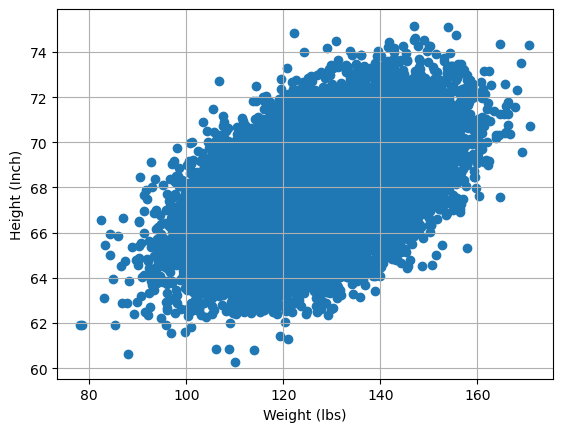

In [21]:
plt.scatter(data_demo["Weight"], data_demo["Height"])
plt.xlabel("Weight (lbs)")
plt.ylabel("Height (Inch)")
plt.grid();

In [22]:
X, y = data_demo["Weight"].values, data_demo["Height"].values

Perform train/test split and scale data.

In [25]:
X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.3, random_state=17
)

In [26]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.reshape([-1, 1]))
X_valid_scaled = scaler.transform(X_valid.reshape([-1, 1]))

Train created `SGDRegressor` with `(X_train_scaled, y_train)` data. Leave default parameter values for now.

In [69]:
%time
reg = SGDRegressor()
reg.fit(X_train_scaled, y_train)

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 4.77 µs


SGDRegressor()

Draw a chart with training process  – dependency of mean squared error from the i-th SGD iteration number.

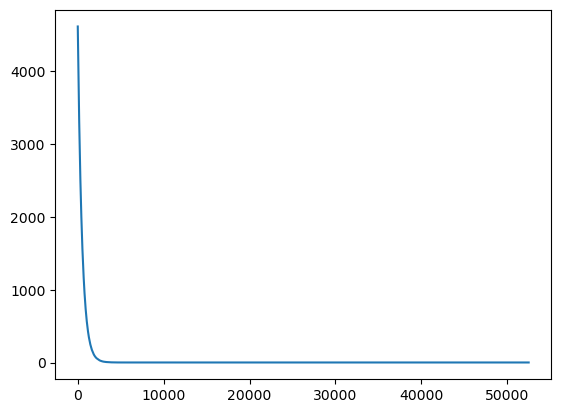

In [60]:
plt.plot(list(range(len(reg.weights_))), reg.mse_);

Print the minimal value of mean squared error and the best weights vector.

In [61]:
reg.w_

array([67.9898497 ,  0.94447605])

Draw chart of model weights ($w_0$ and $w_1$) behavior during training.

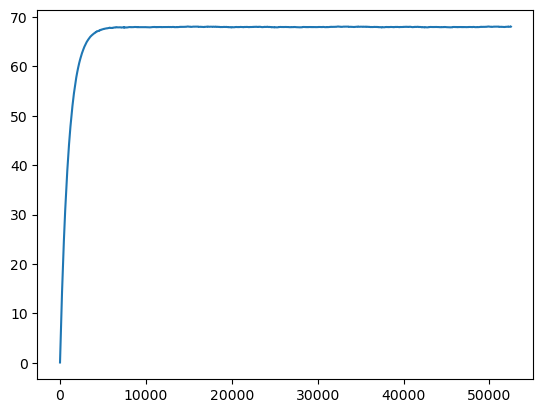

In [65]:
plt.plot(list(range(len(reg.weights_))), [w0 for w0, *_ in reg.weights_]);

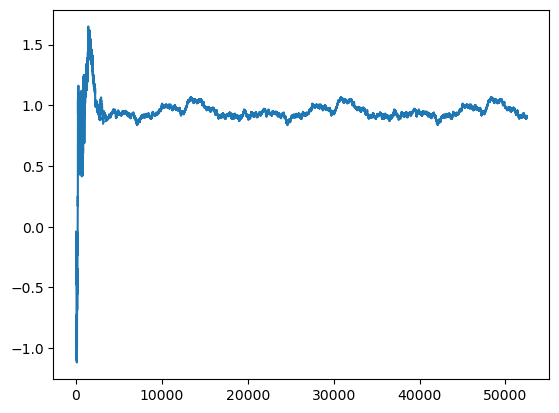

In [66]:
plt.plot(list(range(len(reg.weights_))), [w1 for w0, w1, *_ in reg.weights_]);

Make a prediction for hold-out  set `(X_valid_scaled, y_valid)` and check MSE value.

In [70]:
preds = reg.predict(X_valid_scaled)
sgd_holdout_mse = mean_squared_error(y_valid, preds)

Do the same thing for `LinearRegression` class from `sklearn.linear_model`. Evaluate MSE for hold-out set.

In [ ]:
lr = LinearRegression()
lr.fit(X_)
linreg_holdout_mse = 9

In [ ]:
try:
    assert (sgd_holdout_mse - linreg_holdout_mse) < 1e-4
    print("Correct!")
except AssertionError:
    print(
        "Something's not good.\n Linreg's holdout MSE: {}"
        "\n SGD's holdout MSE: {}".format(linreg_holdout_mse, sgd_holdout_mse)
    )